# Observations

### Observation 1 
Based on the Summary Statistics table provided below, Ramicane appears to have the smallest average and median tumor volume across all of the drugs in the study. This could be a positive indicator for the efficacy of this drug, and could warrant further study. 

### Observation 2
Furthermore, looking at the quartiles and boxplots section of the assignment, Ramicane again appears to be a superior drug when compared to the other 3 in the target group. The IQR is slightly larger than Capomulin, but the Q1 range and median volume are still smaller than all others in the target group. 

### Observation 3
It appears that the larger the initial weight of the mouse, the larger the average tumor volume. This seems obvious, as the larger the mouse is, the larger the potential for tumor growth would seem to be. The linear regression model provided at the end of this notebook quantatively proves this, but the overall mouse weight may also increase with tumor volume because the tumor is a part of the mouse's overall weight. 

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# print(mouse_metadata)
# print(study_results)

# Combine the data into a single dataset
master = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')

# Display the data table for preview
master

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [23]:
# Checking the number of mice.
# print(len(master['Mouse ID']))
mcount = len(master['Mouse ID'].unique())
print(f'The total number of mice in the study is {mcount}.')

The total number of mice in the study is 249.


In [24]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mgroups = master.groupby(['Mouse ID']).count()['Timepoint']
mgroups_df = pd.DataFrame({'Timepoint Entries':mgroups}).sort_values(['Timepoint Entries'], ascending=False)
mgroups_df

,Timepoint Entries
Mouse ID,
g989,13
a203,10
n364,10
m546,10
m550,10
...,...
x226,1
b447,1
f932,1


In [25]:
# Optional: Get all the data for the duplicate mouse ID. 


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mindex = master.set_index('Mouse ID')
mindex = mindex.drop(['g989'])
mindex.reset_index(inplace=True)
mindex

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
# Checking the number of mice in the clean DataFrame.
cleanCount = len(mindex['Mouse ID'].unique())
print(f'The total number of mice in the cleaned study dataframe is {cleanCount}.')

The total number of mice in the cleaned study dataframe is 248.


## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

# Determining all drugs used in the study.
# drugs = mindex['Drug Regimen'].unique()
# drugs

#Using groupby functions to collect data
mean = mindex.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median = mindex.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
variance = mindex.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
stdev = mindex.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
sem = mindex.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

# Combining into one table
summary1 = pd.DataFrame({'Mean Volume':mean, 'Median Volume':median,'Variance':variance, 'Standard Dev':stdev, 'SEM':sem})
summary1

,Mean Volume,Median Volume,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

summary2 = mindex.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

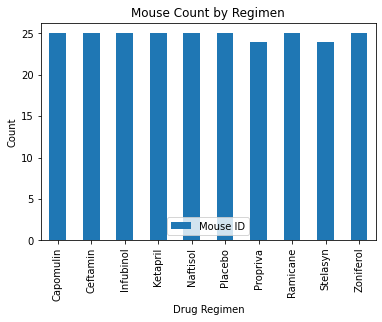

In [30]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bardata = pd.DataFrame(mindex.groupby(['Drug Regimen']).nunique()['Mouse ID'])
pdbar = bardata.plot.bar()
plt.title('Mouse Count by Regimen')
plt.ylabel('Count')
plt.show()

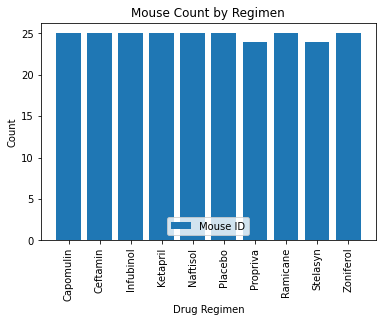

In [38]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
bar2 = mindex.drop_duplicates('Mouse ID')
bar2 = bar2.groupby(['Drug Regimen']).count()['Mouse ID']


fig = plt.figure()
drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
plt.bar(drugs,bar2)
plt.title('Mouse Count by Regimen')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.xlabel('Drug Regimen')
plt.legend(['Mouse ID'], loc=8)
plt.show()

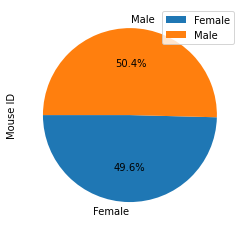

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
piedata = pd.DataFrame(mindex.groupby(['Sex']).nunique()['Mouse ID'])
pdpie = piedata.plot.pie(subplots=True, startangle=180, autopct='%1.1f%%')

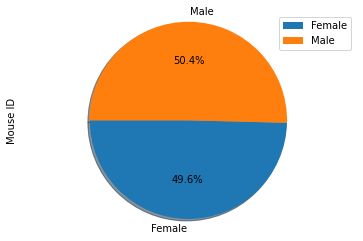

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Female', 'Male'
sizes = piedata['Mouse ID']
explode = (0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
plt.legend()
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.ylabel('Mouse ID')
plt.show()


## Quartiles, Outliers and Boxplots

In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
mindex = mindex.rename(columns={'Drug Regimen':'Drug_Regimen', 'Mouse ID':'Mouse_ID'})

targets = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
mindex2 = mindex[mindex.Drug_Regimen.isin(targets)]

# Start by getting the last (greatest) timepoint for each mouse
mindex2['Max_Timepoint'] = mindex2.groupby('Mouse_ID')['Timepoint'].transform('max')

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged = pd.merge(mindex2, mindex, how='right')
merged

<ipython-input-43-0deffbf134ae>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mindex2['Max_Timepoint'] = mindex2.groupby('Mouse_ID')['Timepoint'].transform('max')


,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max_Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45.0
1,k403,Ramicane,Male,21,16,5,38.825898,0,45.0
2,k403,Ramicane,Male,21,16,10,35.014271,1,45.0
3,k403,Ramicane,Male,21,16,15,34.223992,1,45.0
4,k403,Ramicane,Male,21,16,20,32.997729,1,45.0
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,NaN
1876,z969,Naftisol,Male,9,30,30,65.841013,3,NaN
1877,z969,Naftisol,Male,9,30,35,69.176246,4,NaN
1878,z969,Naftisol,Male,9,30,40,70.314904,4,NaN


In [66]:
# Put treatments into a list for for loop (and later for plot labels)
# (Completed above with the 'target' list)

# Create empty list to fill with tumor vol data (for plotting)
volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for target in targets:
    drugs = merged.loc[merged['Drug_Regimen'] == target]
    finalvol = drugs.loc[drugs['Timepoint'] == drugs['Max_Timepoint']]
    volumes = finalvol['Tumor Volume (mm3)']
    volume.append(volumes)

    quartiles = volumes.quantile([.25, .5, .75])
    iqr = round(quartiles[.75]-quartiles[.25], 6)
    
    # Determine outliers using upper and lower bounds
    upper = round(quartiles[.75] + (1.5*iqr), 6)
    lower = round(quartiles[.25] - (1.5*iqr), 6)
    
    print(f'The lower quartile range for {target} is {quartiles[.25]}.')
    print(f'The median tumor volume for {target} is {quartiles[.5]}.')
    print((f'The upper quartile range for {target} is {quartiles[.75]}.'))
    print(f'The IQR for {target} is {iqr}')
    print(f'Any values above {upper} or below {lower} may be considered outliers.')
    print('-------------------------')
    

The lower quartile range for Capomulin is 32.37735684.
The median tumor volume for Capomulin is 38.1251644.
The upper quartile range for Capomulin is 40.1592203.
The IQR for Capomulin is 7.781863
Any values above 51.832015 or below 20.704562 may be considered outliers for Capomulin.
-------------------------
The lower quartile range for Ramicane is 31.56046955.
The median tumor volume for Ramicane is 36.56165229.
The upper quartile range for Ramicane is 40.65900627.
The IQR for Ramicane is 9.098537
Any values above 54.306812 or below 17.912664 may be considered outliers for Ramicane.
-------------------------
The lower quartile range for Infubinol is 54.04860769.
The median tumor volume for Infubinol is 60.16518046.
The upper quartile range for Infubinol is 65.52574285.
The IQR for Infubinol is 11.477135
Any values above 82.741445 or below 36.832905 may be considered outliers for Infubinol.
-------------------------
The lower quartile range for Ceftamin is 48.72207785.
The median tumor

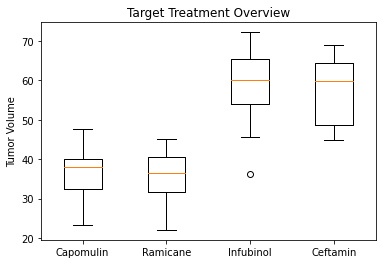

In [77]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(volume)
plt.title('Target Treatment Overview')
plt.xticks([1, 2, 3, 4],['Capomulin', 'Ramicane',
                    'Infubinol', 'Ceftamin'])
plt.ylabel('Tumor Volume')
plt.show()

## Line and Scatter Plots

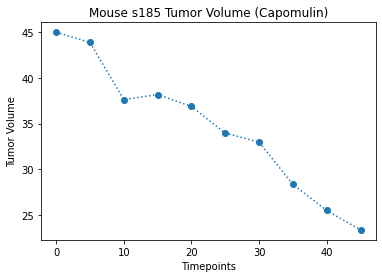

In [105]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap = merged[merged['Drug_Regimen']=='Capomulin']
mouse = cap[cap['Mouse_ID']=='s185']
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker='o', linestyle=':')
plt.title('Mouse s185 Tumor Volume (Capomulin)')
plt.xlabel('Timepoints')
plt.ylabel('Tumor Volume')
plt.show()

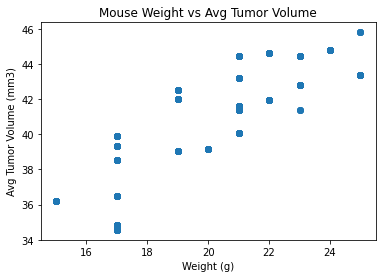

In [91]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avgvol = pd.DataFrame(cap.groupby('Mouse_ID')['Tumor Volume (mm3)'].mean().reset_index())
weight = pd.merge(cap, avgvol, on='Mouse_ID')
# weight.head()
plt.scatter(weight['Weight (g)'], weight['Tumor Volume (mm3)_y'])
plt.title('Mouse Weight vs Avg Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

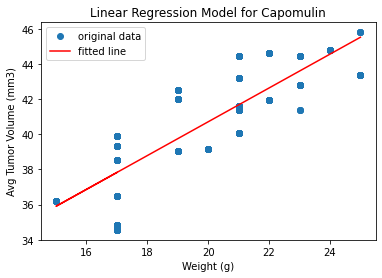

The correlation coefficient for the regression model is 0.8344.


In [104]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plt.plot(weight['Weight (g)'], weight['Tumor Volume (mm3)_y'], 'o', label='original data')
res = st.linregress(weight['Weight (g)'], weight['Tumor Volume (mm3)_y'])
plt.plot(weight['Weight (g)'], res.intercept + res.slope*weight['Weight (g)'], 'r', label='fitted line')
plt.legend()
plt.title('Linear Regression Model for Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()
print(f'The correlation coefficient for the regression model is {round(res[2], 4)}.')